In [1]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# cleanliness!

In [2]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [91]:
INT_df = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df"+".msgpack")
tv_series_mislabelled_as_a_movie = INT_df[INT_df["TMB_tv_not_film"]==1].index
INT_df.drop(tv_series_mislabelled_as_a_movie,inplace=True)

ValueError: path_or_buf needs to be a string file path or file-like

['gender_guess_integrated_crew_mean',
 'gender_guess_integrated_cast_mean',
 'gender_guess_integrated_crew_lead',
 'gender_guess_integrated_cast_lead',
 'gender_guess_integrated_crew_lead5',
 'gender_guess_integrated_cast_lead10']

In [53]:
INT_df_ord_only = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df_ord_only"+".msgpack")

In [54]:
# rename some variables???

INT_df_ord_only.rename(columns={"gender_guess_integrated_crew_lead5": "fraction_male_crew_lead5",
                                           "gender_guess_integrated_cast_lead10": "fraction_male_cast_lead10"},
                       inplace=True)
 



In [55]:
INT_df_ord_only.drop(["SER_release_year","SER_release_month","SER_release_day"],axis=1,inplace=True)

In [56]:
search(INT_df_ord_only,"year")

release_year    49513
dtype: int64

In [97]:
# TMB_runtime, release_year
search(INT_df,"TMB_runtime")

TMB_runtime    43539
dtype: int64

In [20]:
%%time
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False).dropna())

naive_cross_corrs = INT_df_ord_only.corr()    
pd.set_option('max_colwidth', 80)
corrank(naive_cross_corrs) # prints a descending list of correlation pair (Max on top)

                                                                                  pairs  \
275708             (TMB_production_countries_South Korea, TMB_original_language_Korean)   
279834                (TMB_spoken_languages_Malayalam, TMB_original_language_Malayalam)   
275659              (TMB_production_countries_South Korea, TMB_spoken_languages_Korean)   
279558                      (TMB_spoken_languages_Korean, TMB_original_language_Korean)   
273258                   (TMB_production_countries_Iran, TMB_original_language_Persian)   
271994                 (TMB_production_countries_Finland, TMB_spoken_languages_Finnish)   
273824                 (TMB_production_countries_Japan, TMB_original_language_Japanese)   
279464                  (TMB_spoken_languages_Japanese, TMB_original_language_Japanese)   
271839                (TMB_production_countries_Estonia, TMB_spoken_languages_Estonian)   
273775                  (TMB_production_countries_Japan, TMB_spoken_languages_Japanese)   

In [80]:
# %%time

pattern = "TMB_num_production_companies"
name = "TMB_num_production_companies"
corr_type = "spearman"
df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Top 20 positive (spearman) correlations for TMB_num_production_companies r p N 
 
 TMB_num_production_countries 
 0.51 
 0.00 
 45354 
 
 
 TMB_crew_size 
 0.49 
 0.00 
 44591 
 
 
 budget_normalised 
 0.41 
 0.00 
 9848 
 
 
 TMB_cast_size 
 0.34 
 0.00 
 42944 
 
 
 mean_order_crew_lead5 
 0.3 
 0.00 
 42060 
 
 
 TMB_num_langs_per_movie 
 0.29 
 0.00 
 45354 
 
 
 credit_number_crew_lead5 
 0.27 
 0.00 
 44591 
 
 
 gross_normalised 
 0.27 
 0.00 
 8554 
 
 
 TMB_num_keywords 
 0.25 
 0.00 
 25957 
 
 
 TMB_num_genres_per_movie 
 0.25 
 0.00 
 45354 
 
 
 TMB_runtime 
 0.21 
 0.00 
 43539 
 
 
 importulence_cast_lead10 
 0.18 
 0.00 
 40704 
 
 
 credit_number_cast_lead10 
 0.18 
 0.00 
 42577 
 
 
 TMB_production_companies_Canal+ 
 0.18 
 0.00 
 33527 
 
 
 SER_num_genres 
 0.16 
 0.00 
 41891 
 
 
 SER_num_starring 
 0.16 
 0.00 
 41686 
 
 
 TMB_production_countries_France 
 0.16 
 0.00 
 39112 
 
 
 TMB_genres_Drama 
 0.14 
 0.00 
 45354 
 
 
 TMB_genres_Thriller 
 0.13 
 0.00 
 45354 
 
 
 TMB_production_companies_Centre National de la[...] 
 0.12 
 0.00 
 33527 
 
 Top 20 negative (spearman) correlations for TMB_num_production_companies r p N 
 
 NUM_domestic_gross_fraction 
 -0.36 
 0.00 
 4718 
 
 
 fractional_mean_order_cast_lead10 
 -0.21 
 0.00 
 40743 
 
 
 TMB_genres_Documentary 
 -0.18 
 0.00 
 45354 
 
 
 fractional_mean_order_crew_lead5 
 -0.15 
 0.00 
 42060 
 
 
 fraction_male_crew_lead5 
 -0.12 
 0.00 
 43898 
 
 
 TMB_genres_Foreign 
 -0.09 
 0.00 
 45354 
 
 
 department_number_crew_lead5 
 -0.08 
 0.00 
 42060 
 
 
 TMB_production_companies_RKO Radio Pictures 
 -0.07 
 0.00 
 33527 
 
 
 TMB_production_companies_Metro-Goldwyn-Mayer (MGM) 
 -0.07 
 0.00 
 33527 
 
 
 TMB_spoken_languages_Hindi 
 -0.06 
 0.00 
 41547 
 
 
 TMB_production_countries_India 
 -0.06 
 0.00 
 39112 
 
 
 TMB_tagline_length 
 -0.06 
 0.00 
 20372 
 
 
 TMB_keyword_silent film 
 -0.05 
 0.00 
 25957 
 
 
 TMB_keyword_film noir 
 -0.05 
 0.00 
 25957 
 
 
 mean_order_cast_lead10 
 -0.04 
 0.00 
 40743 
 
 
 TMB_production_companies_Universal International[...] 
 -0.04 
 0.00 
 33527 
 
 
 TMB_production_companies_Mosfilm 
 -0.04 
 0.00 
 33527 
 
 
 TMB_original_language_Hindi 
 -0.04 
 0.00 
 45354 
 
 
 TMB_production_countries_Russia 
 -0.04 
 0.00 
 39112 
 
 
 TMB_keyword_short 
 -0.04 
 0.00 
 25957

In [ ]:
## (1) Release Year x Runtime

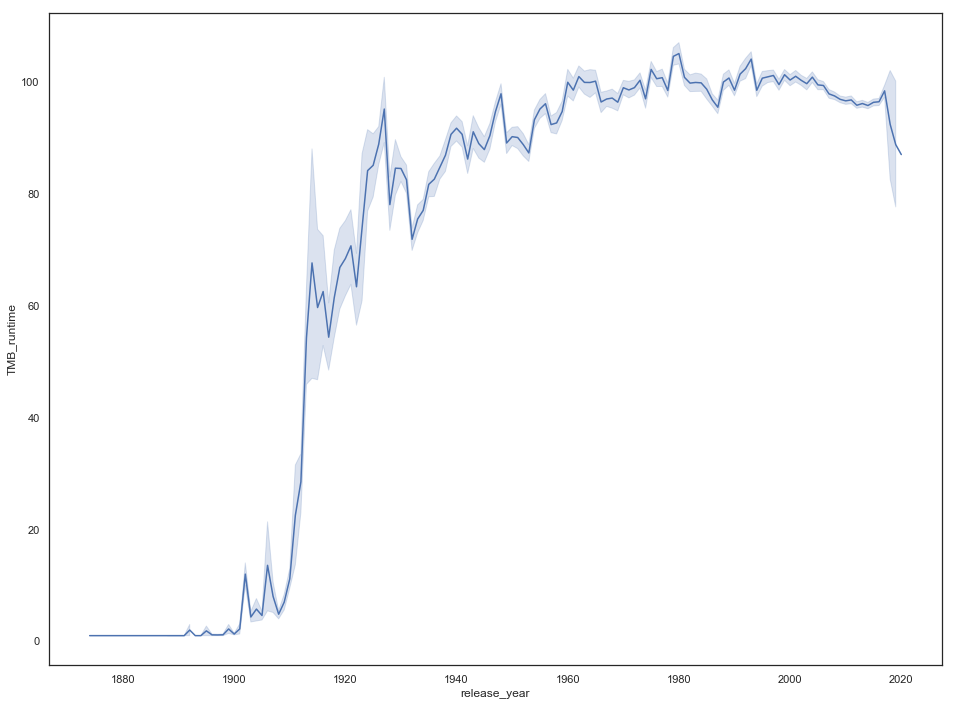

In [211]:
# sns.set()
plt.figure(figsize=(16,12));
sns.lineplot(x="release_year", y="TMB_runtime", data=INT_df, ci=68);

In [84]:
release_decade = INT_df["release_year"].apply(lambda x: str(int(10*np.floor(x/10))) if pd.notnull(x) else np.nan)

In [111]:
release_decade.value_counts()

2010    14642
2000    11833
1990     5896
1980     4172
1970     3800
1960     3003
1950     2213
1940     1645
1930     1453
1920      452
1910      198
1900      110
1890       85
1880        6
2020        3
1870        2
Name: release_year, dtype: int64

In [119]:
release_decade.replace(["1880","1870","2020"], np.nan,inplace=True)

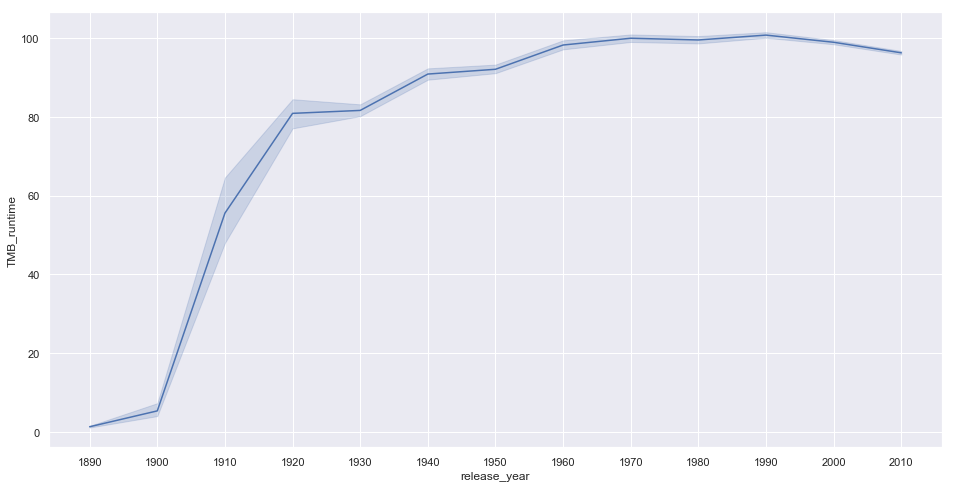

In [123]:
plt.figure(figsize=(16,8));
sns.lineplot(x=release_decade, y=INT_df["TMB_runtime"]);

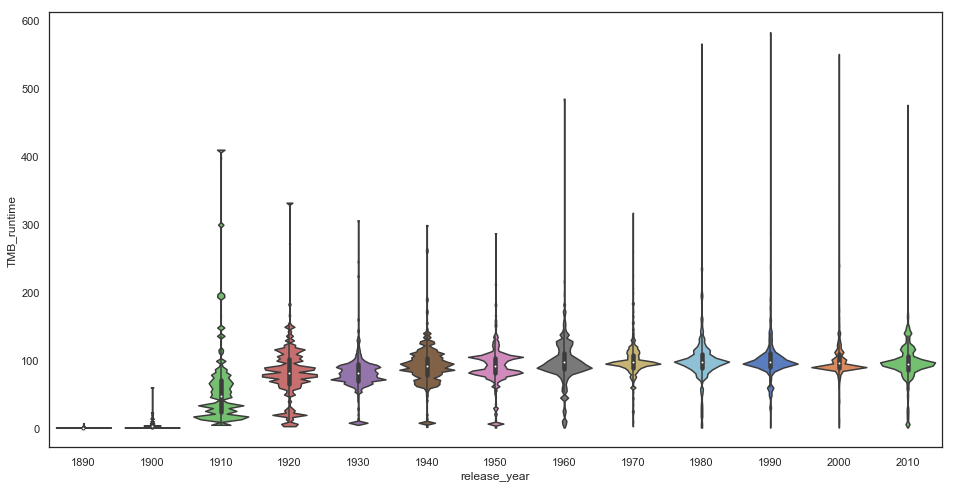

In [212]:
plt.figure(figsize=(16,8));
sns.violinplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted', scale='width', cut=0,bw=.01);
# probably not the bandwidth granularity to go with, but has a nice Rorschach feel to it "Which of these butterflies would you like to murder while pretending it's your mother?"

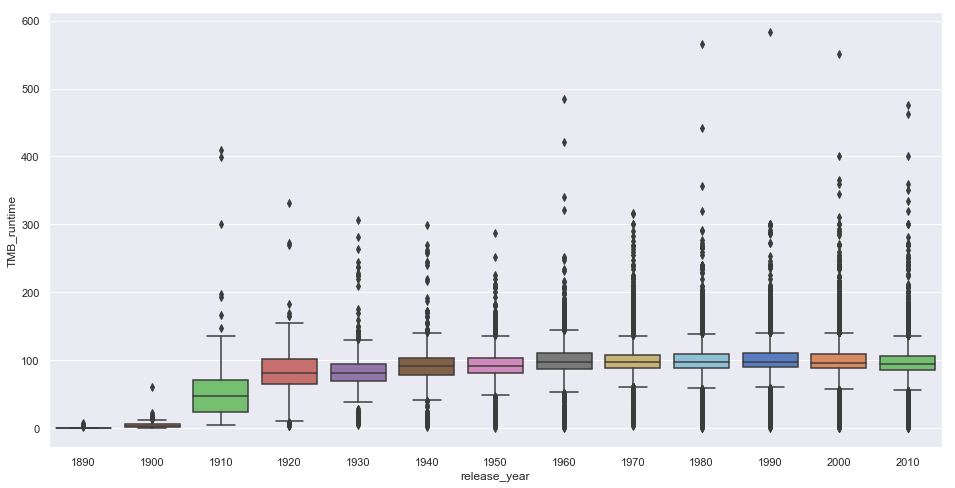

In [139]:
plt.figure(figsize=(16,8));
sns.boxplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);


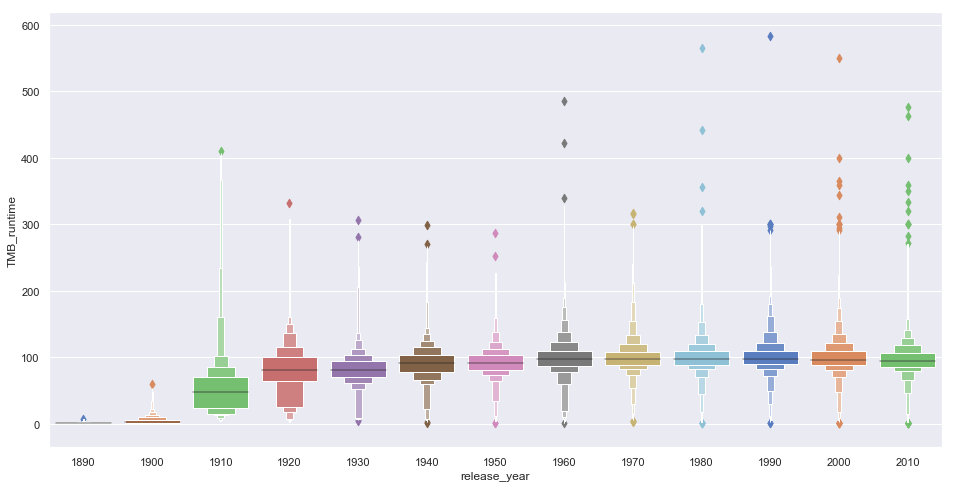

In [140]:
plt.figure(figsize=(16,8));
sns.boxenplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);
# I think this wins on cuteness

In [145]:
# # unspeakably slow! c
# plt.figure(figsize=(16,8));
# sns.swarmplot(x=release_decade, y=INT_df["TMB_runtime"], order = release_decade.value_counts().sort_index().index);

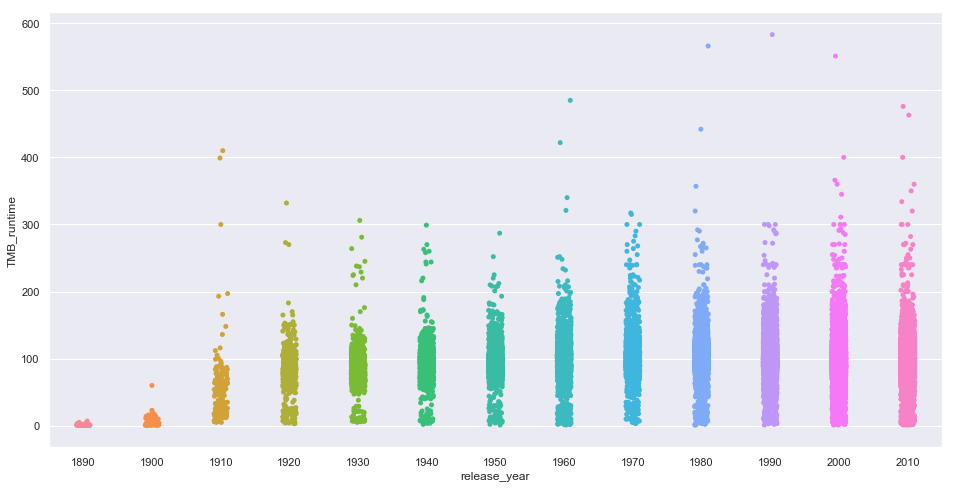

In [143]:
plt.figure(figsize=(16,8));
sns.stripplot(x=release_decade, y=INT_df["TMB_runtime"], order = release_decade.value_counts().sort_index().index);

<Figure size 1152x576 with 0 Axes>

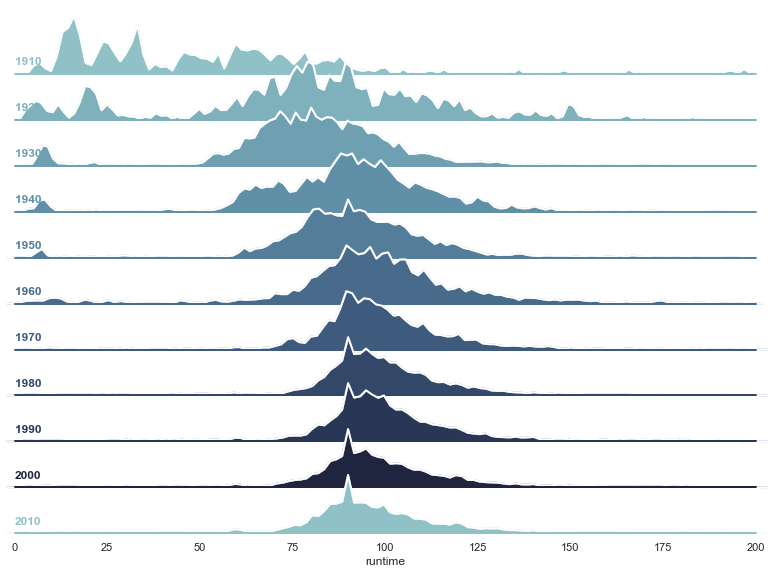

In [209]:

# https://seaborn.pydata.org/examples/kde_ridgeplot.html
# yoink!
plt.figure(figsize=(16,8));

# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(runtime=INT_df["TMB_runtime"], g=release_decade)).dropna()
df.drop(df[df["g"].apply(lambda x: x in ["1890","1900"])].index, inplace=True)
df.drop(df[df["runtime"]>200].index, inplace=True)

# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.75, palette=pal,
                  row_order = ['1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010'], sharey=False);

# Draw the densities in a few steps
g.map(sns.kdeplot, "runtime", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "runtime", clip_on=False, color="w", lw=2, bw=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes);


g.map(label, "runtime");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);
plt.xlim((0,200))

# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
g.despine(bottom=True, left=True);

In [ ]:
### (2) Release Year x How Many (Other) Movies The (top 5) Crew Were/Will Go On To Be In

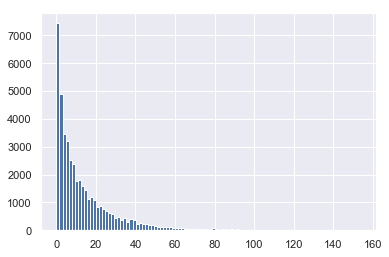

In [30]:
INT_df_ord_only["credit_number_crew_lead5"].hist(bins=100);
# base distribution of (top 5) crew credits 

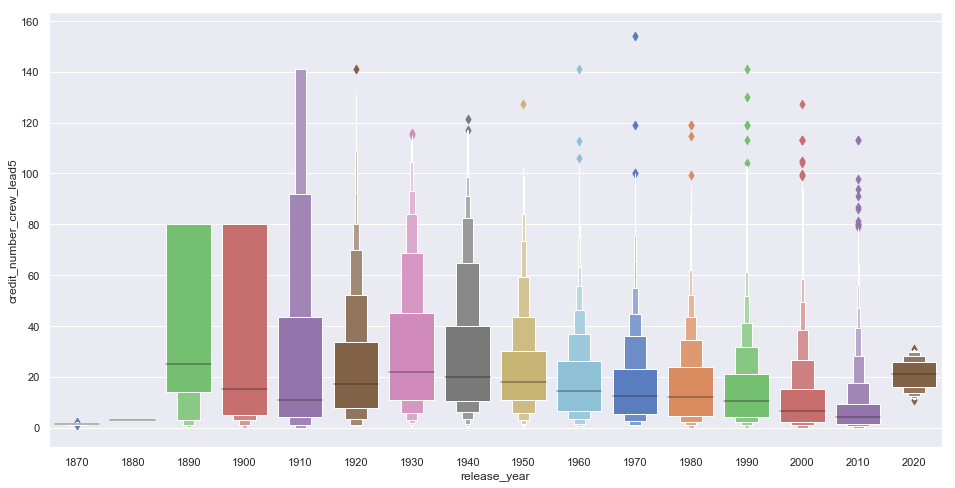

In [65]:
plt.figure(figsize=(16,8));
sns.boxenplot(x=release_decade, y=INT_df_ord_only["credit_number_crew_lead5"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);
# plt.ylim(INT_df_ord_only["credit_number_crew_lead5"].min(),INT_df_ord_only["credit_number_crew_lead5"].max())

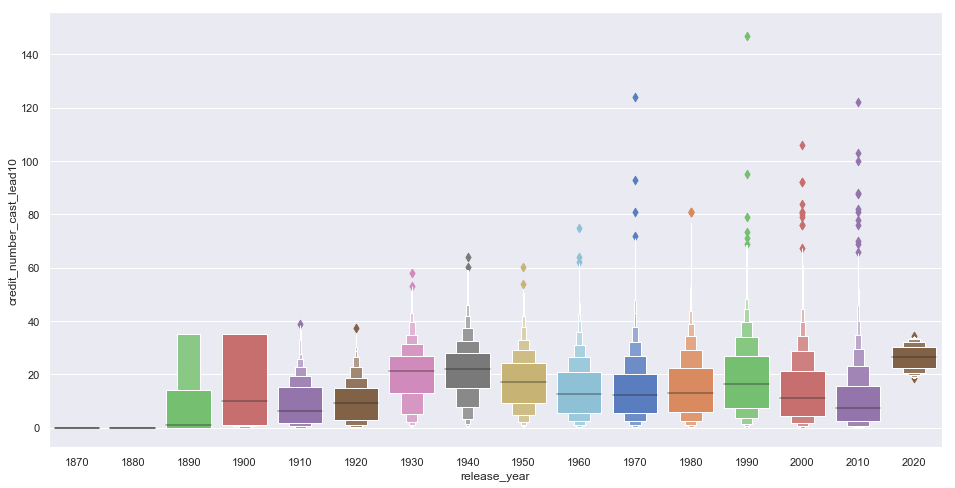

In [64]:
plt.figure(figsize=(16,8));
sns.boxenplot(x=release_decade, y=INT_df_ord_only["credit_number_cast_lead10"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);
# plt.ylim(INT_df_ord_only["credit_number_crew_lead5"].min(),INT_df_ord_only["credit_number_crew_lead5"].max())

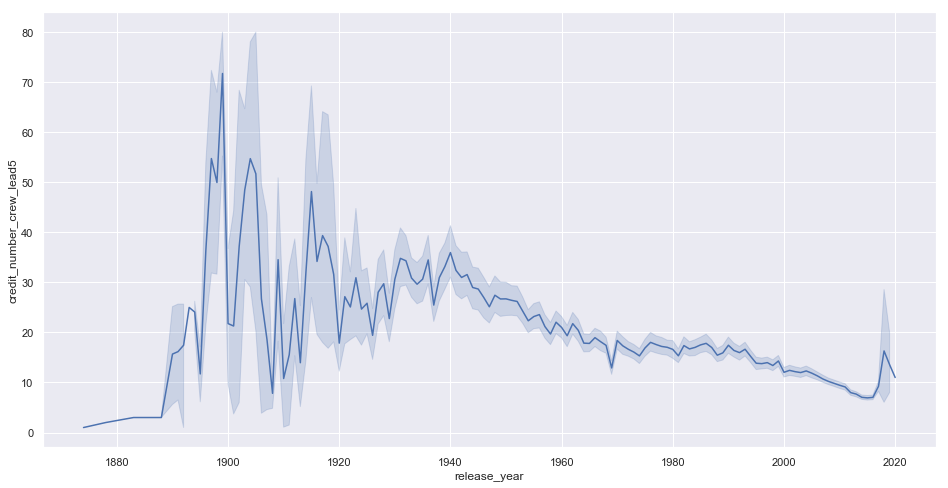

In [67]:
plt.figure(figsize=(16,8));
sns.lineplot(x=INT_df_ord_only["release_year"], y=INT_df_ord_only["credit_number_crew_lead5"],
              palette='muted',);
# plt.ylim(INT_df_ord_only["credit_number_crew_lead5"].min(),INT_df_ord_only["credit_number_crew_lead5"].max())

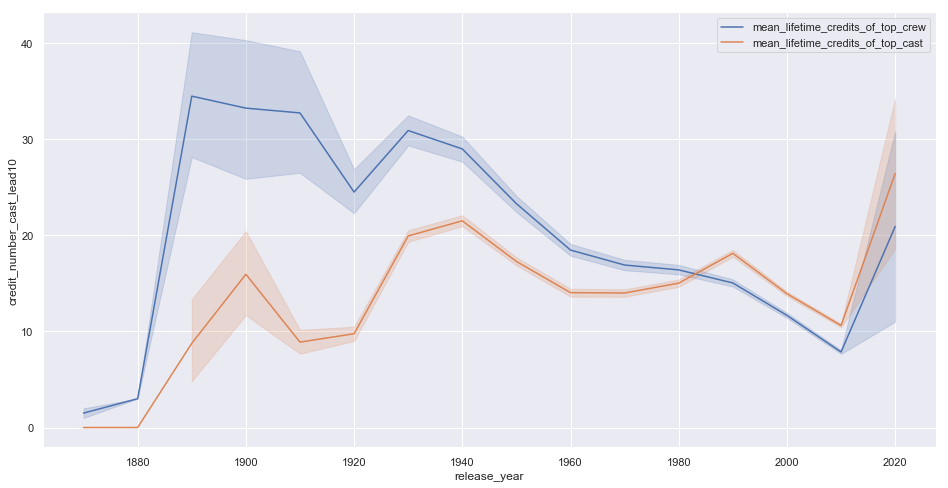

In [75]:
plt.figure(figsize=(16,8));
sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["credit_number_crew_lead5"],
              palette='muted',label="mean_lifetime_credits_of_top_crew");
sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["credit_number_cast_lead10"],
              palette='muted',label="mean_lifetime_credits_of_top_cast");

plt.legend();

# top crew were **really important** early on in film
# top cast appear to have been pretty disposable

# that only reverses in the 90s and the difference is much smaller

In [ ]:
## (3) Release Year x Num Production Companies

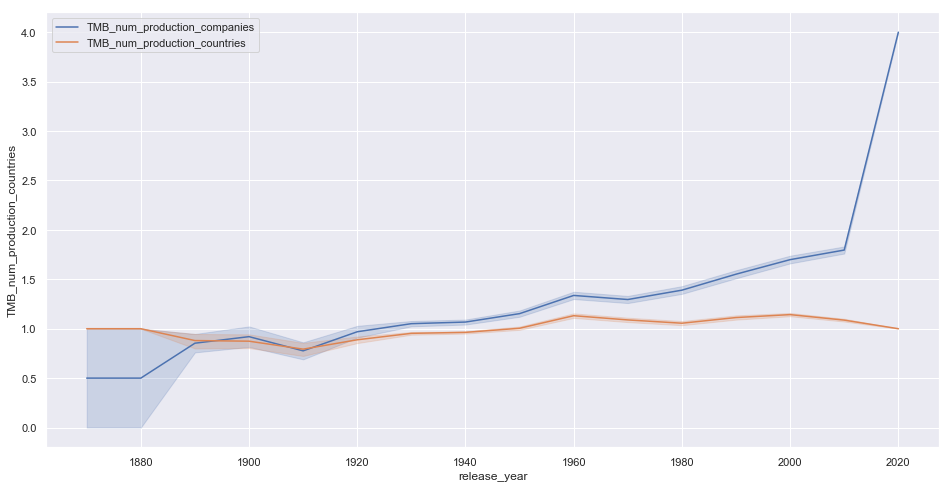

In [79]:
plt.figure(figsize=(16,8));
# sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["credit_number_crew_lead5"],
#               palette='muted',label="mean_lifetime_credits_of_top_crew");
sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["TMB_num_production_companies"],
              palette='muted',label="TMB_num_production_companies");
sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["TMB_num_production_countries"],
              palette='muted',label="TMB_num_production_countries");

# Can't help but feel that sub-zero production_countries says more about data quality than offworld production
# Ditto, 2020/1870-180 should probably be clipped off (too small sample)

# That aside looks like fairly boring story of developing industry
# for prod_countries maybe more interesting to take a view that highlights the tail
# (not a big deal, only added to contrast that num-prod companies changes w time and num-prod-countries doesn't)

In [ ]:
## (4) Release Year x Gender Balance

In [85]:
trimmed_release_decade = release_decade.replace(["1880","1870","2020"], np.nan)
trimmed_release_decade_int = trimmed_release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan)

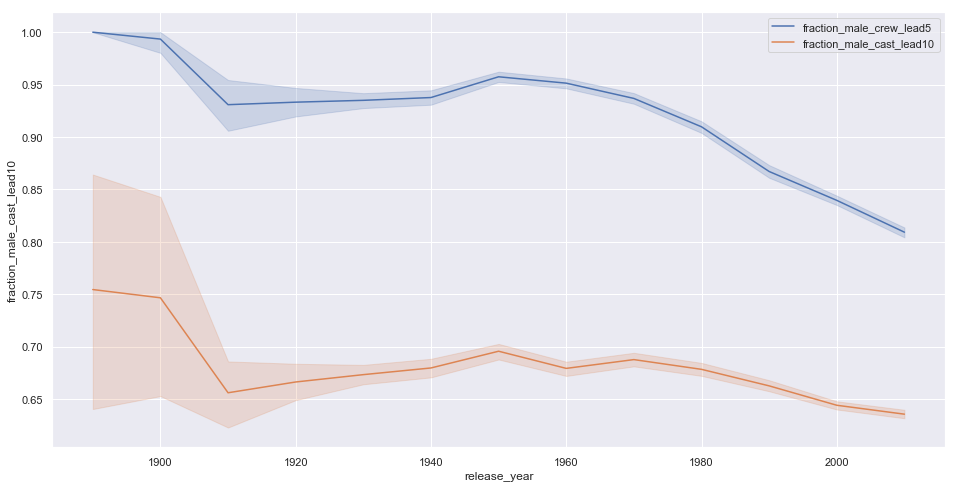

In [86]:
plt.figure(figsize=(16,8));
# sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["credit_number_crew_lead5"],
#               palette='muted',label="mean_lifetime_credits_of_top_crew");
var1 = "fraction_male_crew_lead5"
var2 = "fraction_male_cast_lead10"
sns.lineplot(x=trimmed_release_decade_int, y=INT_df_ord_only[var1],
              palette='muted',label=var1);
sns.lineplot(x=trimmed_release_decade_int, y=INT_df_ord_only[var2],
              palette='muted',label=var2);

# Gosh - you know, I mostly look at these after they've been standardised/in terms of marginal effects rather than the absolute values


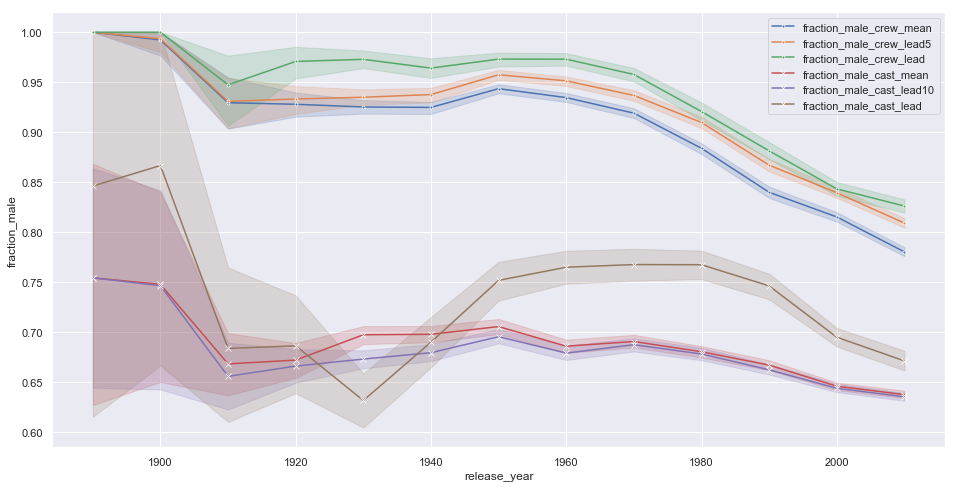

In [108]:
# When I aggregated a bunch of cast/crew variables for each movie, I did it for *just the lead*/*just the lead median cast(10)/crew size(10)*/whole cast/crew listed ('mean')
# After a lot of fiddling I was able to convince myself that the 'best' (in terms of predicting other variables) was the top median lead cast/crew
# But in this one case I feel like it might be worth looking at all three different aggregates

plt.figure(figsize=(16,8));
# sns.lineplot(x=release_decade.apply(lambda x: int(x) if pd.notnull(x) else np.nan), y=INT_df_ord_only["credit_number_crew_lead5"],
#               palette='muted',label="mean_lifetime_credits_of_top_crew");

gender_vars = [x for x in INT_df.columns if re.search("gender_guess",x)]
gender_vars.sort(reverse = True)
for var in gender_vars:
# var1 = "fraction_male_crew_lead5"
# var2 = "fraction_male_cast_lead10"
# sns.lineplot(x=trimmed_release_decade_int, y=INT_df_ord_only[var1],
#               palette='muted',label=var1);
    marker = "."
    if "cast" in var:
        marker = "x"
    sns.lineplot(x=trimmed_release_decade_int, y=INT_df[var],
                  palette='muted',label=var.replace("gender_guess_integrated","fraction_male"), marker=marker);

plt.ylabel("fraction_male");

# Gosh - you know, I mostly look at these after they've been standardised/in terms of marginal effects rather than the absolute values


Warning, filename truncated because it was over 50. Filenames may no longer be unique


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.09378
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:1.0721
[2]	validation_0-rmse:1.05004
[3]	validation_0-rmse:1.02976
[4]	validation_0-rmse:1.01212
[5]	validation_0-rmse:0.99417
[6]	validation_0-rmse:0.980729
[7]	validation_0-rmse:0.966917
[8]	validation_0-rmse:0.95184
[9]	validation_0-rmse:0.937434
[10]	validation_0-rmse:0.924167
[11]	validation_0-rmse:0.911967
[12]	validation_0-rmse:0.900737
[13]	validation_0-rmse:0.891212
[14]	validation_0-rmse:0.880821
[15]	validation_0-rmse:0.871199
[16]	validation_0-rmse:0.861848
[17]	validation_0-rmse:0.854241
[18]	validation_0-rmse:0.847441
[19]	validation_0-rmse:0.839432
[20]	validation_0-rmse:0.832549
[21]	validation_0-rmse:0.825685
[22]	validation_0-rmse:0.820167
[23]	validation_0-rmse:0.814003
[24]	

[246]	validation_0-rmse:0.644558
[247]	validation_0-rmse:0.644461
[248]	validation_0-rmse:0.644368
[249]	validation_0-rmse:0.644058
[250]	validation_0-rmse:0.643974
[251]	validation_0-rmse:0.643829
[252]	validation_0-rmse:0.643736
[253]	validation_0-rmse:0.643591
[254]	validation_0-rmse:0.643459
[255]	validation_0-rmse:0.643351
[256]	validation_0-rmse:0.643255
[257]	validation_0-rmse:0.643198
[258]	validation_0-rmse:0.64309
[259]	validation_0-rmse:0.642989
[260]	validation_0-rmse:0.6426
[261]	validation_0-rmse:0.64254
[262]	validation_0-rmse:0.642412
[263]	validation_0-rmse:0.642275
[264]	validation_0-rmse:0.64221
[265]	validation_0-rmse:0.642126
[266]	validation_0-rmse:0.641981
[267]	validation_0-rmse:0.641881
[268]	validation_0-rmse:0.641781
[269]	validation_0-rmse:0.641739
[270]	validation_0-rmse:0.641685
[271]	validation_0-rmse:0.641565
[272]	validation_0-rmse:0.641105
[273]	validation_0-rmse:0.641044
[274]	validation_0-rmse:0.640993
[275]	validation_0-rmse:0.640907
[276]	validatio

[496]	validation_0-rmse:0.623115
[497]	validation_0-rmse:0.623074
[498]	validation_0-rmse:0.623075
[499]	validation_0-rmse:0.623063
[500]	validation_0-rmse:0.623042
[501]	validation_0-rmse:0.622992
[502]	validation_0-rmse:0.622924
[503]	validation_0-rmse:0.622862
[504]	validation_0-rmse:0.622835
[505]	validation_0-rmse:0.622804
[506]	validation_0-rmse:0.622725
[507]	validation_0-rmse:0.622676
MSE: 0.39, MAE: 0.45, EV: 0.61, R2: 0.61


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:00:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


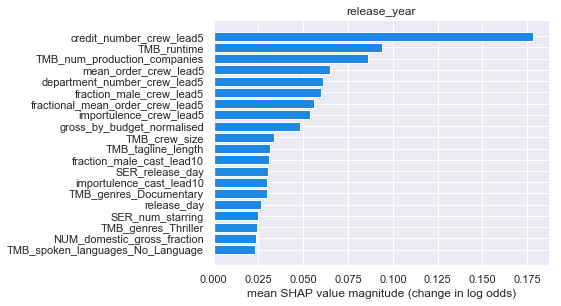

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\shap\plots\summary.py:206: RuntimeWarning: invalid value encountered in greater
  cvals[cvals_imp > vmax] = vmax
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\shap\plots\summary.py:207: RuntimeWarning: invalid value encountered in less
  cvals[cvals_imp < vmin] = vmin
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


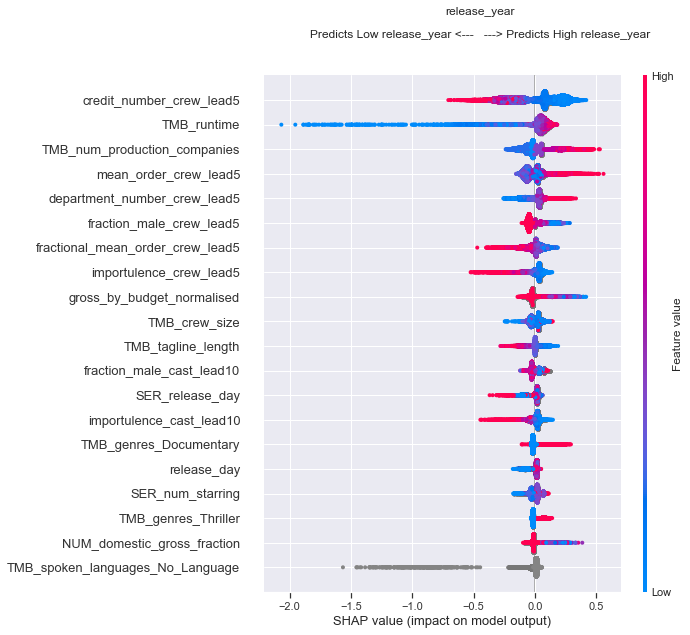

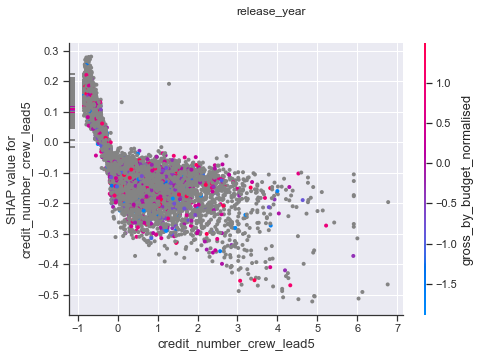

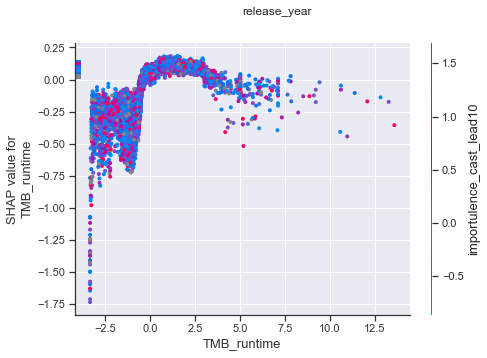

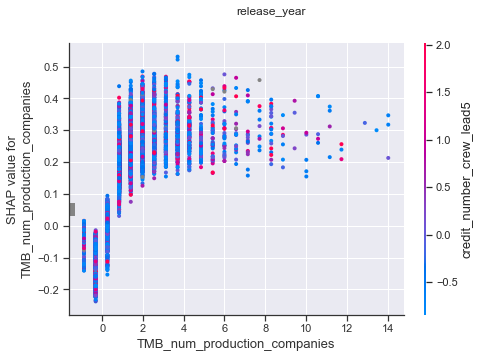

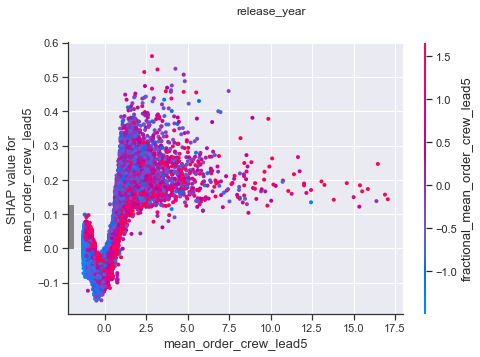

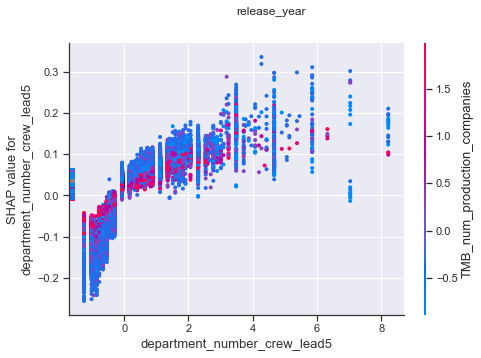

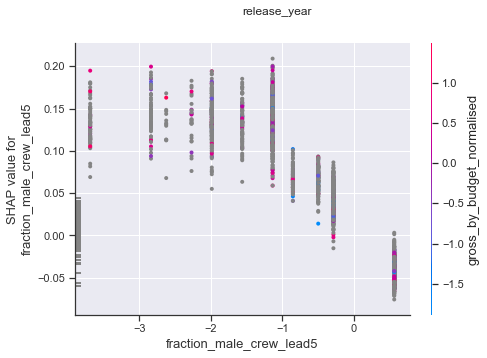

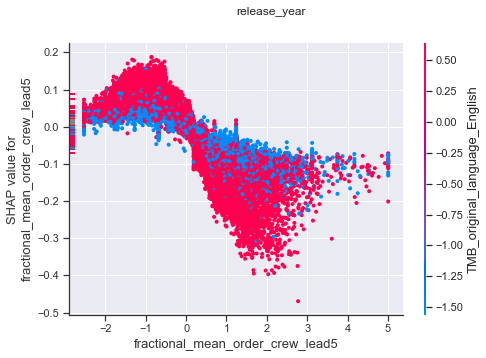

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


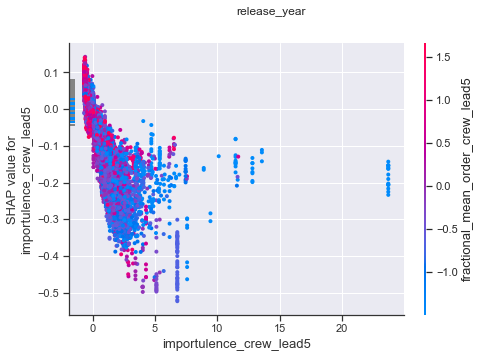

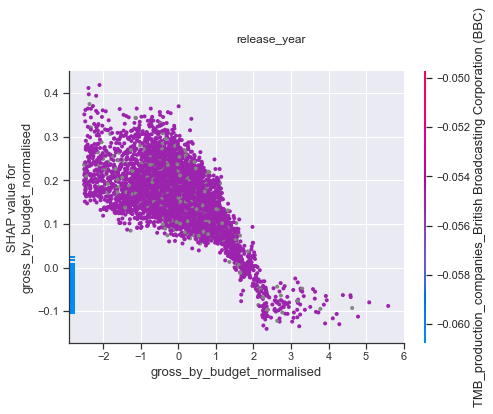

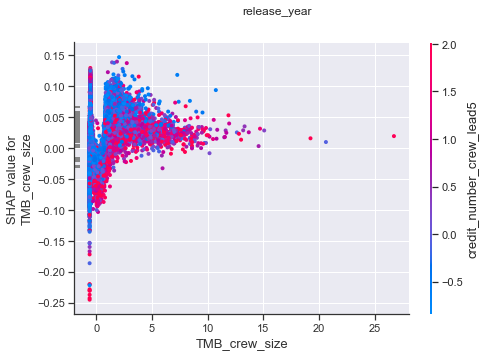

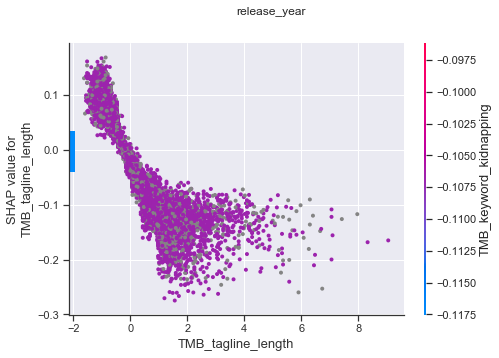

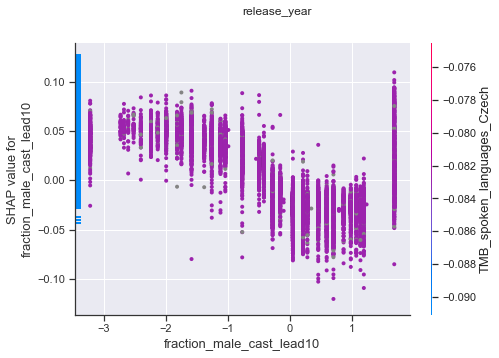

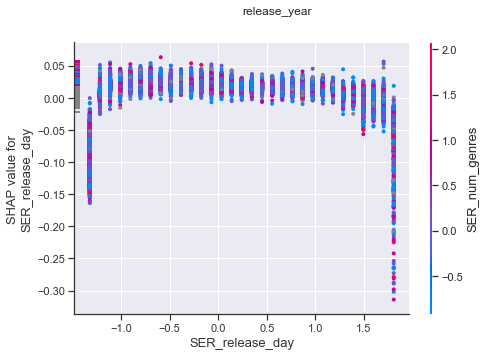

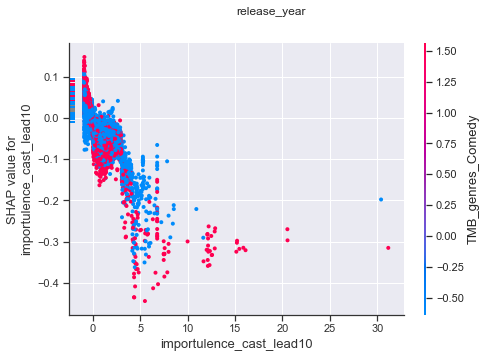

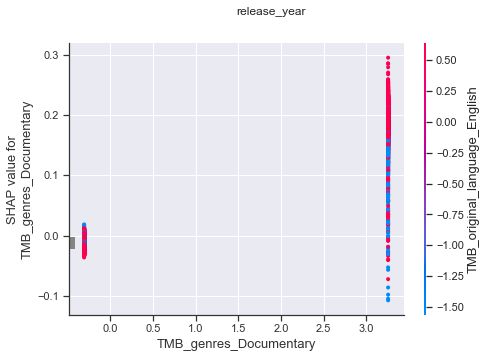

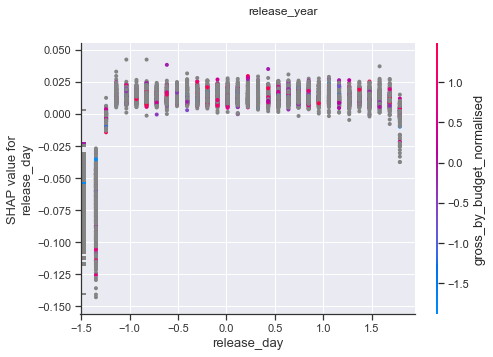

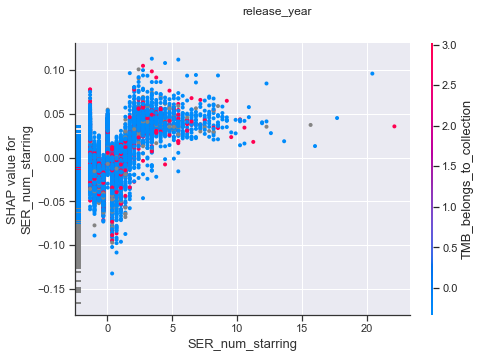

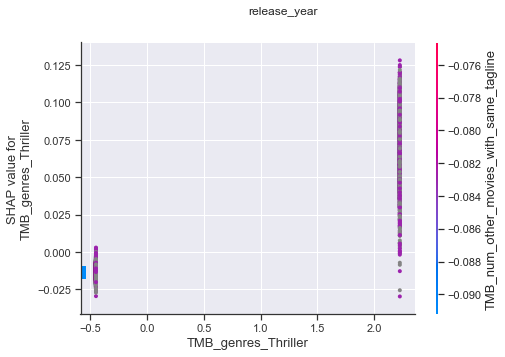

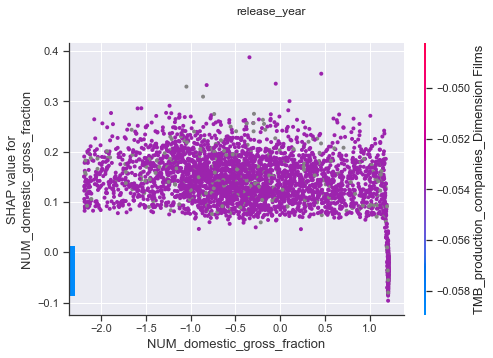

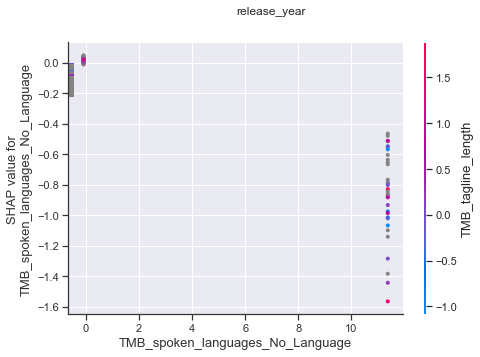

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique
Wall time: 51min 17s


In [16]:
%%time
global BES_output_folder
drop_cols = []
Treatment = "xgboost_numerical_only_with_agg_crew_cast_data_with_fusion_data"

# drop_cols.extend(fused_cols)

drop_cols.extend(["budget_normalised","gross_normalised",
                  "TMB_num_other_movies_with_same_homepage"]) # inflation is cheating!
var_name = "release_year"


BES_output_folder= ".."+os.sep+"Output"+os.sep


df = INT_df_ord_only.drop(drop_cols,axis=1).copy()
drop_movies = df[df.isnull().all(axis=1)].index
df.drop(drop_movies,inplace=True)
# standardise data (subtract out the mean, divide through by standard deviation)
df = pd.DataFrame(           StandardScaler().fit_transform(df.values ),
                             columns = df.columns,
                             index   = df.index      )

mask = df[var_name].notnull()
df = df[mask]
colname = var_name
var_stub = var_name
var_list = [var_name]
var_stub_list = [var_stub]

(explainer, shap_values) = xgboost_run(subdir=colname,min_features = min(df.shape[1]-1,20),
           title = colname+"\n\nPredicts Low "+colname+" <---   ---> Predicts High "+colname, dependence_plots=True, output_folder=BES_output_folder)


Warning, filename truncated because it was over 50. Filenames may no longer be unique


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.09421
Will train until validation_0-rmse hasn't improved in 50.7 rounds.
[1]	validation_0-rmse:1.07248
[2]	validation_0-rmse:1.05028
[3]	validation_0-rmse:1.02991
[4]	validation_0-rmse:1.01124
[5]	validation_0-rmse:0.993218
[6]	validation_0-rmse:0.979562
[7]	validation_0-rmse:0.965526
[8]	validation_0-rmse:0.950574
[9]	validation_0-rmse:0.936507
[10]	validation_0-rmse:0.92423
[11]	validation_0-rmse:0.911559
[12]	validation_0-rmse:0.900668
[13]	validation_0-rmse:0.890407
[14]	validation_0-rmse:0.880151
[15]	validation_0-rmse:0.870602
[16]	validation_0-rmse:0.861565
[17]	validation_0-rmse:0.854127
[18]	validation_0-rmse:0.8468
[19]	validation_0-rmse:0.838508
[20]	validation_0-rmse:0.831023
[21]	validation_0-rmse:0.824357
[22]	validation_0-rmse:0.819399
[23]	validation_0-rmse:0.812512
[24]	validation_0-r

[246]	validation_0-rmse:0.644644
[247]	validation_0-rmse:0.644505
[248]	validation_0-rmse:0.644403
[249]	validation_0-rmse:0.644014
[250]	validation_0-rmse:0.643924
[251]	validation_0-rmse:0.643832
[252]	validation_0-rmse:0.64371
[253]	validation_0-rmse:0.643477
[254]	validation_0-rmse:0.64338
[255]	validation_0-rmse:0.643313
[256]	validation_0-rmse:0.643227
[257]	validation_0-rmse:0.64317
[258]	validation_0-rmse:0.643049
[259]	validation_0-rmse:0.642932
[260]	validation_0-rmse:0.642513
[261]	validation_0-rmse:0.642455
[262]	validation_0-rmse:0.64236
[263]	validation_0-rmse:0.642219
[264]	validation_0-rmse:0.642152
[265]	validation_0-rmse:0.642072
[266]	validation_0-rmse:0.641958
[267]	validation_0-rmse:0.641876
[268]	validation_0-rmse:0.641642
[269]	validation_0-rmse:0.641558
[270]	validation_0-rmse:0.641438
[271]	validation_0-rmse:0.641349
[272]	validation_0-rmse:0.640968
[273]	validation_0-rmse:0.640902
[274]	validation_0-rmse:0.640704
[275]	validation_0-rmse:0.640639
[276]	validati

[495]	validation_0-rmse:0.622809
[496]	validation_0-rmse:0.622641
[497]	validation_0-rmse:0.622605
[498]	validation_0-rmse:0.622585
[499]	validation_0-rmse:0.622569
[500]	validation_0-rmse:0.622553
[501]	validation_0-rmse:0.622505
[502]	validation_0-rmse:0.622432
[503]	validation_0-rmse:0.622391
[504]	validation_0-rmse:0.622366
[505]	validation_0-rmse:0.622231
[506]	validation_0-rmse:0.622138
MSE: 0.39, MAE: 0.45, EV: 0.61, R2: 0.61


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


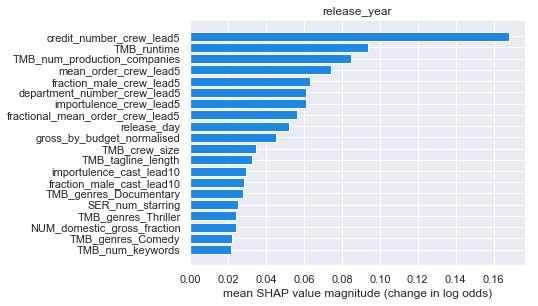

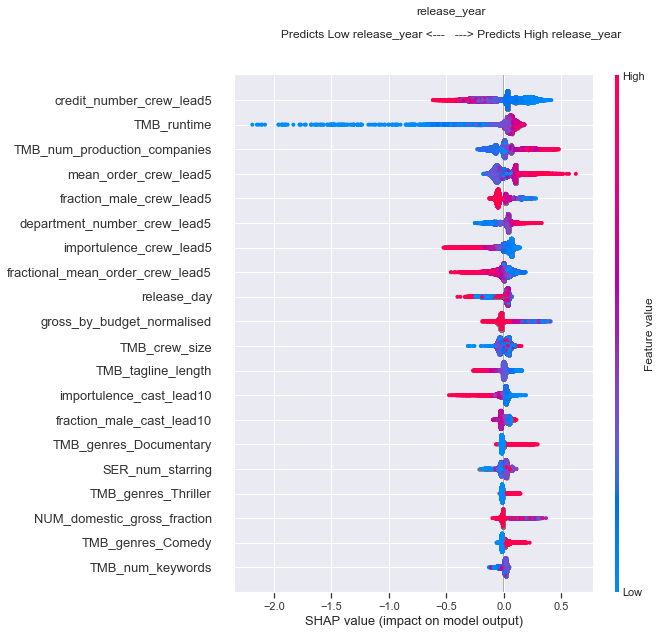

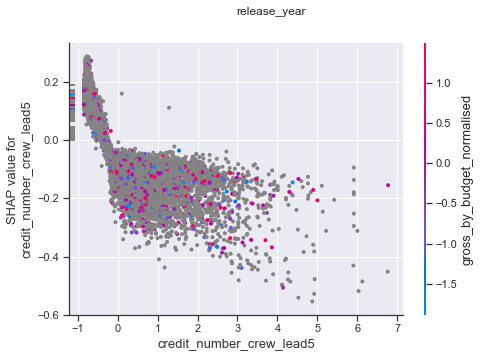

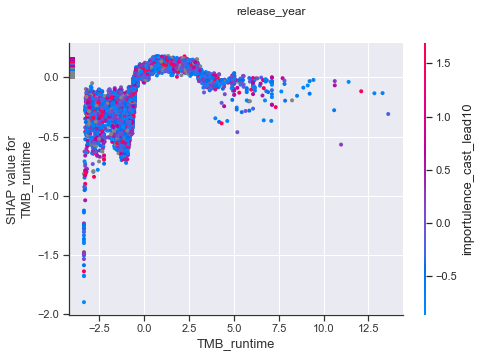

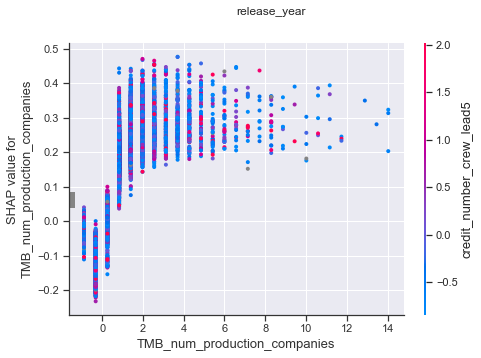

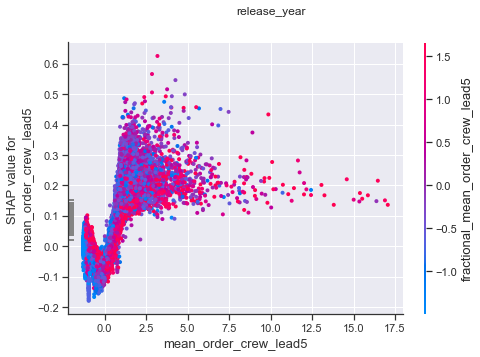

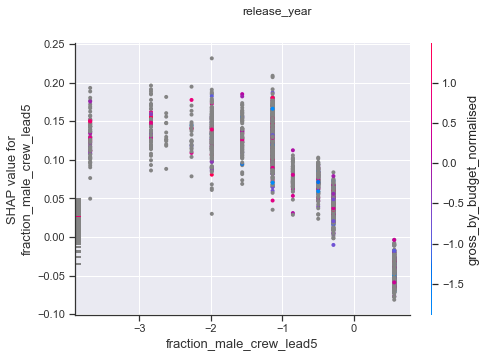

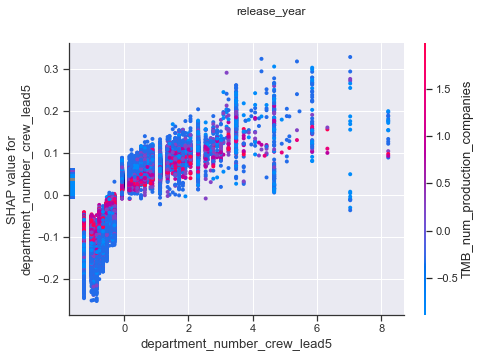

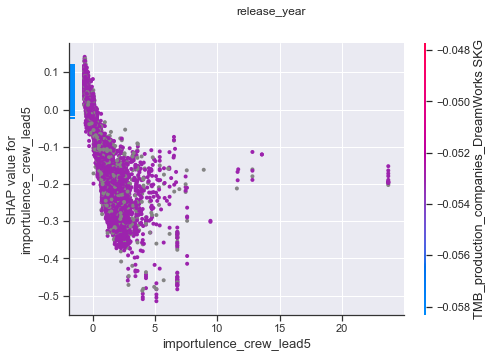

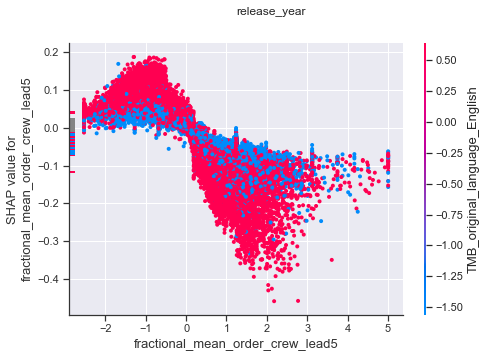

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


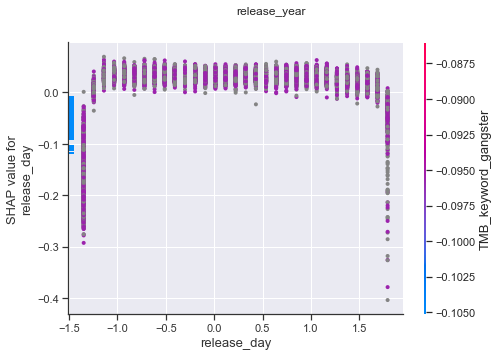

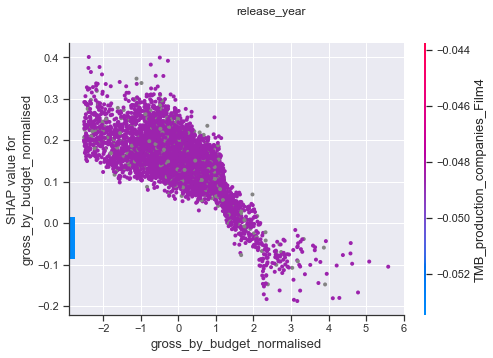

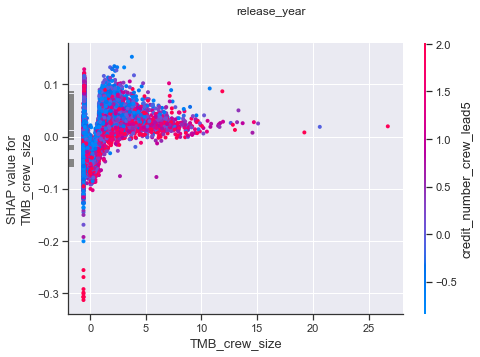

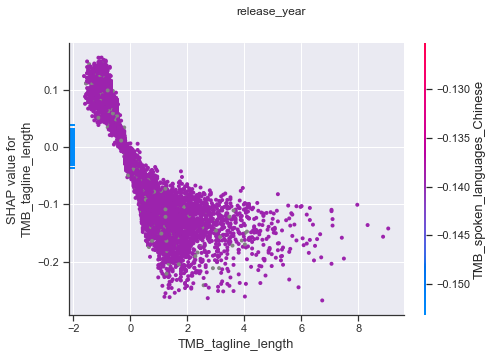

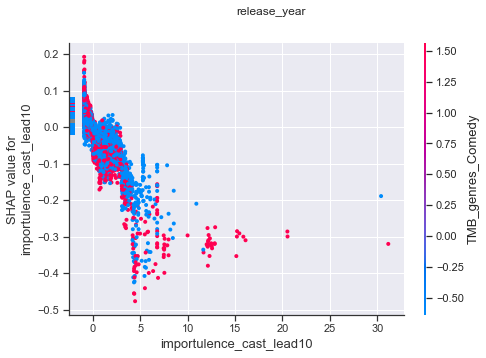

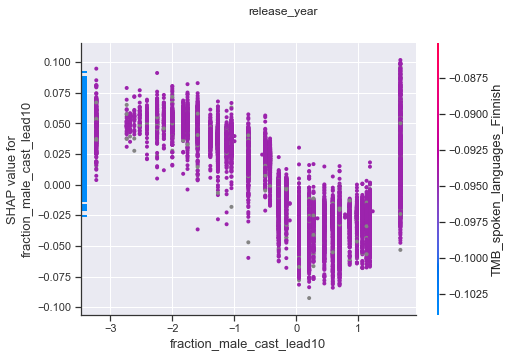

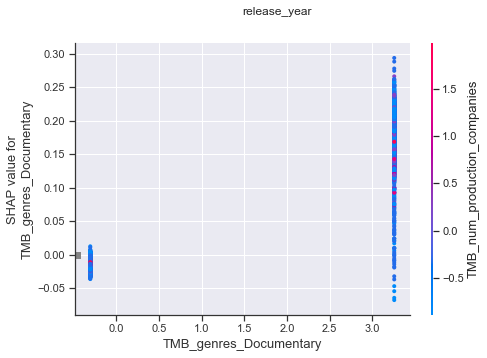

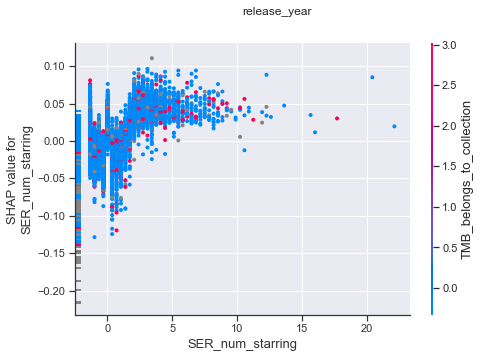

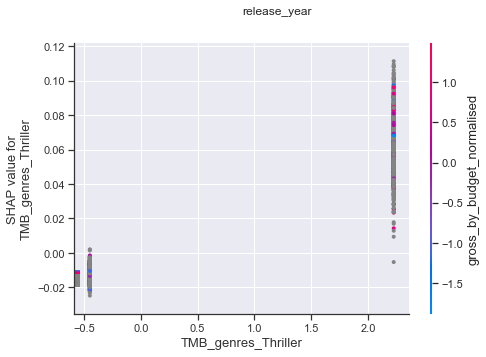

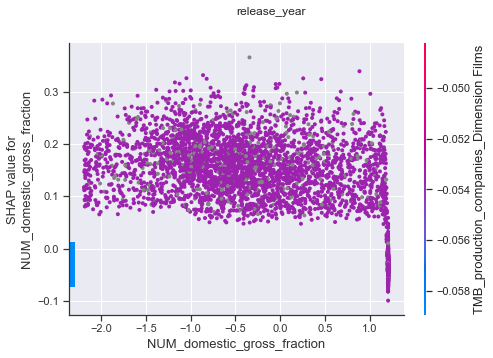

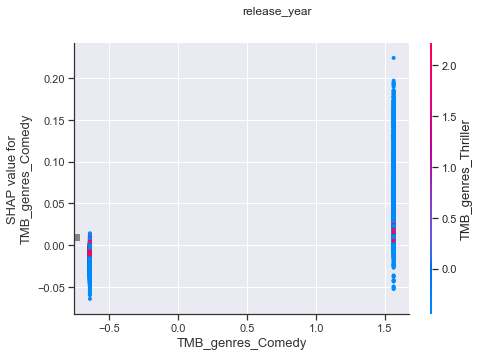

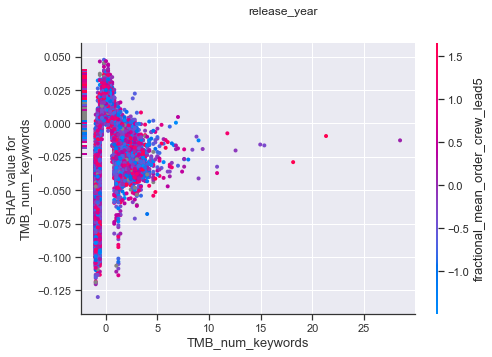

Wall time: 50min 31s


In [24]:
%%time
global BES_output_folder
drop_cols = []
Treatment = "xgboost_numerical_only_with_agg_crew_cast_data_with_fusion_data"

# drop_cols.extend(fused_cols)

drop_cols.extend(["budget_normalised","gross_normalised",
                  "TMB_num_other_movies_with_same_homepage"]) # inflation is cheating!
var_name = "release_year"


BES_output_folder= ".."+os.sep+"Output"+os.sep


df = INT_df_ord_only.drop(drop_cols,axis=1).copy()
drop_movies = df[df.isnull().all(axis=1)].index
df.drop(drop_movies,inplace=True)
# standardise data (subtract out the mean, divide through by standard deviation)
df = pd.DataFrame(           StandardScaler().fit_transform(df.values ),
                             columns = df.columns,
                             index   = df.index      )

mask = df[var_name].notnull()
df = df[mask]
colname = var_name
var_stub = var_name
var_list = [var_name]
var_stub_list = [var_stub]

(explainer, shap_values) = xgboost_run(subdir=colname,min_features = min(df.shape[1]-1,20),
           title = colname+"\n\nPredicts Low "+colname+" <---   ---> Predicts High "+colname, dependence_plots=True, output_folder=BES_output_folder)


Warning, filename truncated because it was over 50. Filenames may no longer be unique


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:27:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.09887
Will train until validation_0-rmse hasn't improved in 50.6 rounds.
[1]	validation_0-rmse:1.08149
[2]	validation_0-rmse:1.06359
[3]	validation_0-rmse:1.04601
[4]	validation_0-rmse:1.02967
[5]	validation_0-rmse:1.01573
[6]	validation_0-rmse:1.00389
[7]	validation_0-rmse:0.990805
[8]	validation_0-rmse:0.977346
[9]	validation_0-rmse:0.966033
[10]	validation_0-rmse:0.954494
[11]	validation_0-rmse:0.943398
[12]	validation_0-rmse:0.934164
[13]	validation_0-rmse:0.924527
[14]	validation_0-rmse:0.916306
[15]	validation_0-rmse:0.908395
[16]	validation_0-rmse:0.900551
[17]	validation_0-rmse:0.893613
[18]	validation_0-rmse:0.8874
[19]	validation_0-rmse:0.88015
[20]	validation_0-rmse:0.873027
[21]	validation_0-rmse:0.867966
[22]	validation_0-rmse:0.863758
[23]	validation_0-rmse:0.858108
[24]	validation_0-rms

[246]	validation_0-rmse:0.681163
[247]	validation_0-rmse:0.681042
[248]	validation_0-rmse:0.680906
[249]	validation_0-rmse:0.68062
[250]	validation_0-rmse:0.6805
[251]	validation_0-rmse:0.680404
[252]	validation_0-rmse:0.680239
[253]	validation_0-rmse:0.67997
[254]	validation_0-rmse:0.679821
[255]	validation_0-rmse:0.679674
[256]	validation_0-rmse:0.679546
[257]	validation_0-rmse:0.679456
[258]	validation_0-rmse:0.679348
[259]	validation_0-rmse:0.679223
[260]	validation_0-rmse:0.679062
[261]	validation_0-rmse:0.678862
[262]	validation_0-rmse:0.678644
[263]	validation_0-rmse:0.678378
[264]	validation_0-rmse:0.678323
[265]	validation_0-rmse:0.678272
[266]	validation_0-rmse:0.67818
[267]	validation_0-rmse:0.678041
[268]	validation_0-rmse:0.677849
[269]	validation_0-rmse:0.677741
[270]	validation_0-rmse:0.677623
[271]	validation_0-rmse:0.677521
[272]	validation_0-rmse:0.677397
[273]	validation_0-rmse:0.677311
[274]	validation_0-rmse:0.677066
[275]	validation_0-rmse:0.677019
[276]	validatio

[496]	validation_0-rmse:0.656713
[497]	validation_0-rmse:0.656515
[498]	validation_0-rmse:0.656462
[499]	validation_0-rmse:0.656274
[500]	validation_0-rmse:0.656193
[501]	validation_0-rmse:0.656158
[502]	validation_0-rmse:0.656113
[503]	validation_0-rmse:0.656083
[504]	validation_0-rmse:0.656045
[505]	validation_0-rmse:0.656006
MSE: 0.43, MAE: 0.48, EV: 0.57, R2: 0.57


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:40:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


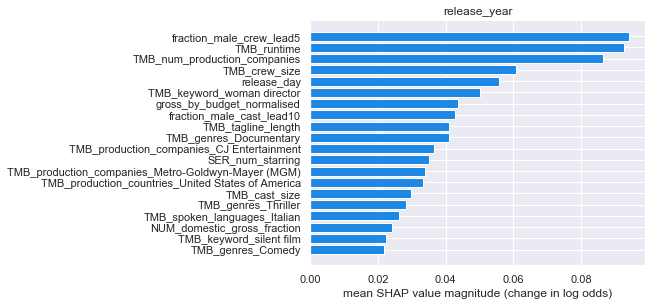

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\shap\plots\summary.py:206: RuntimeWarning: invalid value encountered in greater
  cvals[cvals_imp > vmax] = vmax
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\shap\plots\summary.py:207: RuntimeWarning: invalid value encountered in less
  cvals[cvals_imp < vmin] = vmin
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


ValueError: minvalue must be less than or equal to maxvalue

<Figure size 576x684 with 2 Axes>

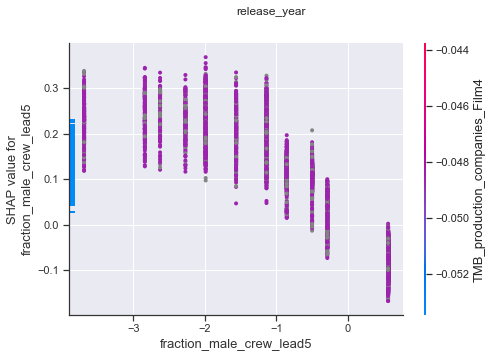

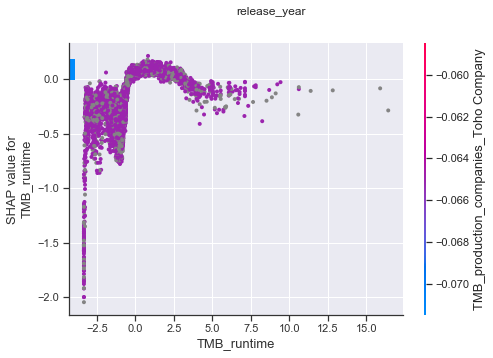

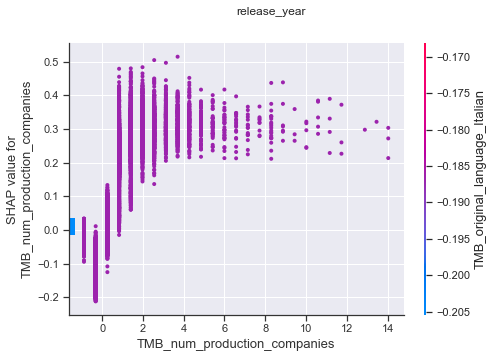

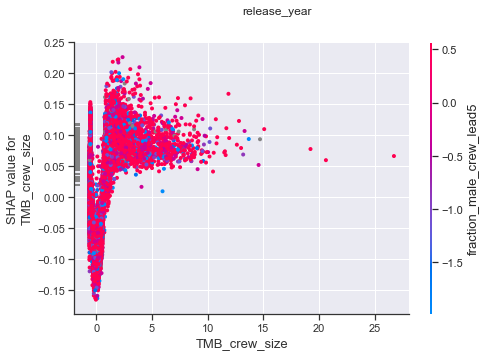

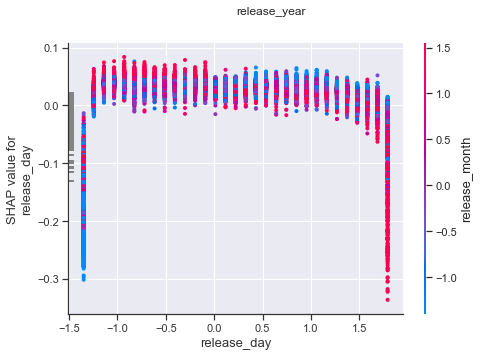

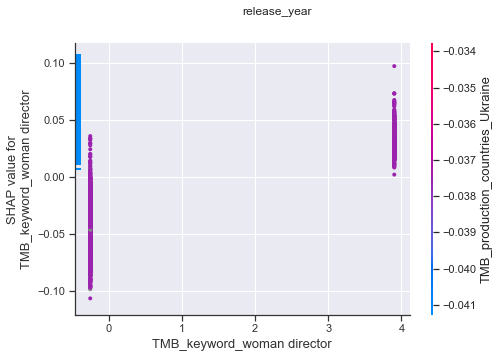

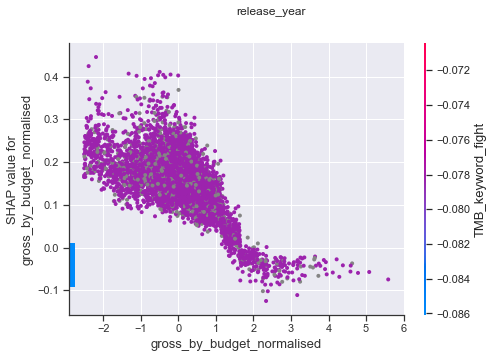

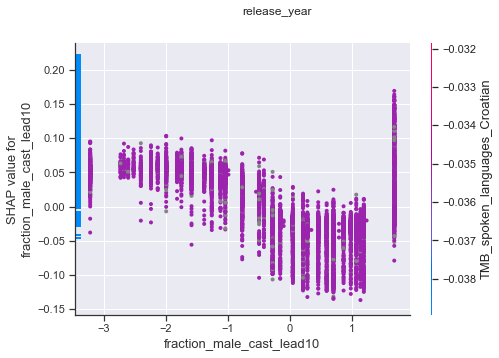

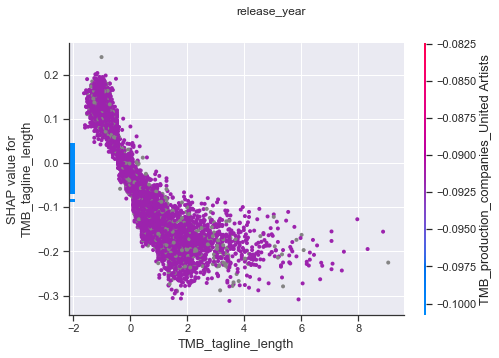

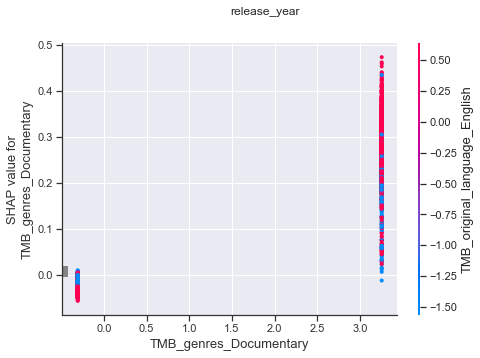

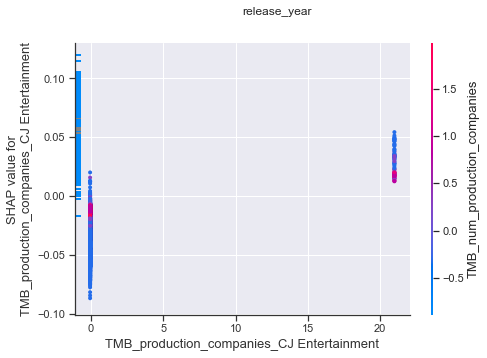

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


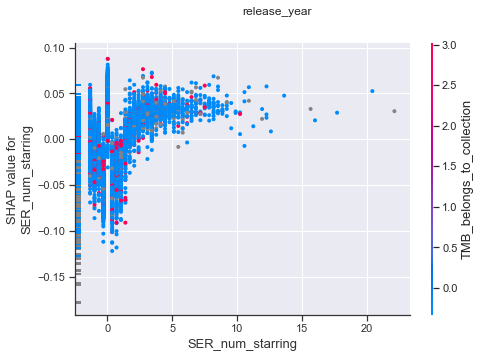

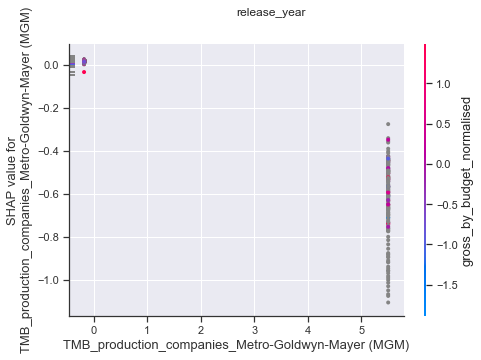

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


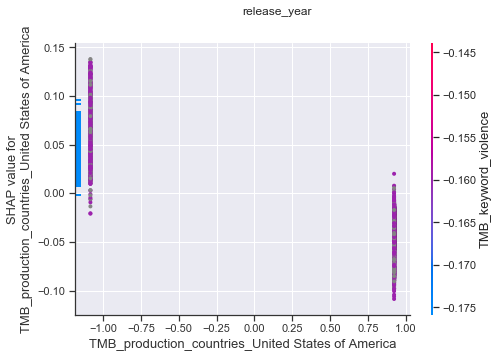

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


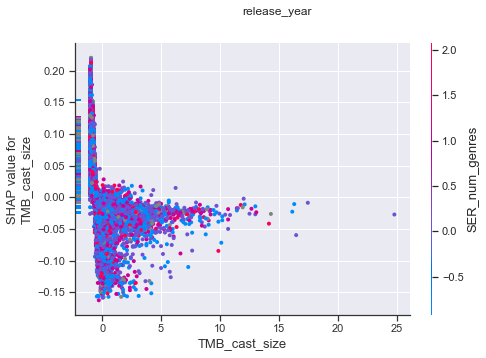

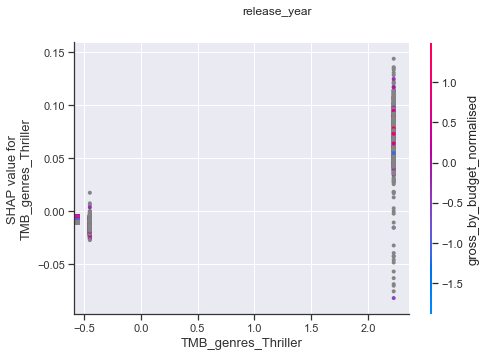

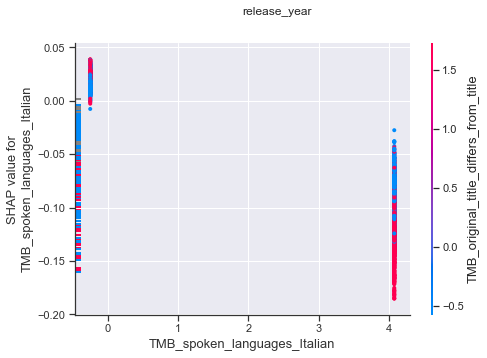

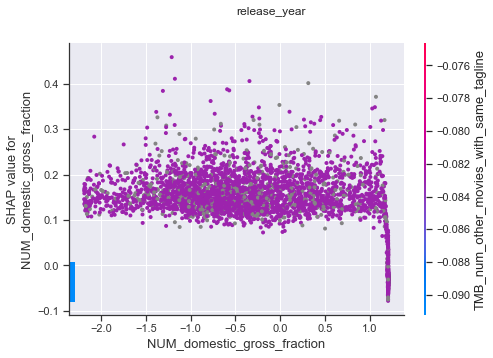

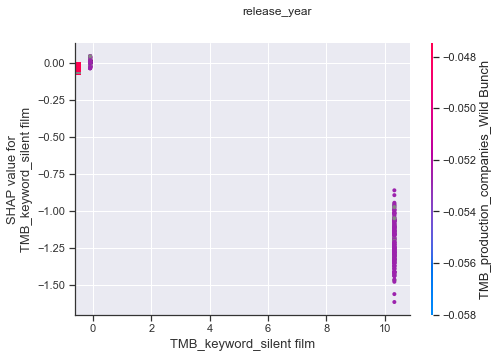

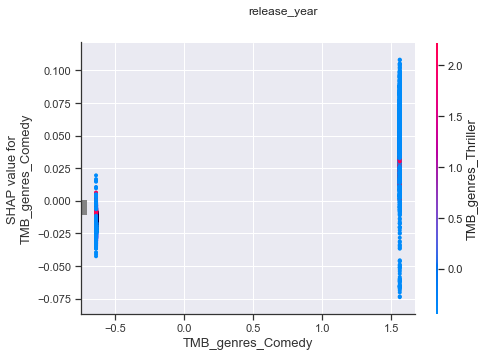

Wall time: 47min 37s


In [76]:
%%time
global BES_output_folder
drop_cols = []
Treatment = "xgboost_numerical_only_with_agg_crew_cast_data_with_fusion_data"

cast_crew_vars = [x for x in INT_df_ord_only.columns if re.search("_lead5|_lead10",x) ]
cast_crew_vars.remove("fraction_male_crew_lead5")
cast_crew_vars.remove("fraction_male_cast_lead10")

drop_cols.extend(cast_crew_vars)

drop_cols.extend(["budget_normalised","gross_normalised",
                  "TMB_num_other_movies_with_same_homepage"]) # inflation is cheating!
var_name = "release_year"


BES_output_folder= ".."+os.sep+"Output"+os.sep


df = INT_df_ord_only.drop(drop_cols,axis=1).copy()
drop_movies = df[df.isnull().all(axis=1)].index
df.drop(drop_movies,inplace=True)
# standardise data (subtract out the mean, divide through by standard deviation)
df = pd.DataFrame(           StandardScaler().fit_transform(df.values ),
                             columns = df.columns,
                             index   = df.index      )

mask = df[var_name].notnull()
df = df[mask]
colname = var_name
var_stub = var_name
var_list = [var_name]
var_stub_list = [var_stub]

(explainer, shap_values) = xgboost_run(subdir=colname,min_features = min(df.shape[1]-1,20),
           title = colname+"\n\nPredicts Low "+colname+" <---   ---> Predicts High "+colname, dependence_plots=True, output_folder=BES_output_folder)
